<a href="https://colab.research.google.com/github/Jamil-Ray/Jamil/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [ ]:
import pandas as pn
url ='https://raw.githubusercontent.com/swakkhar/MachineLearning/master/Codes/logistic.csv'
data = pn.read_csv(url,header=None)
import numpy as np
data=np.asarray(data)
X = np.delete(data, data.shape[1] - 1, axis=1)
y = data[:, -1]

In [ ]:
y.shape

(100,)

In [ ]:
X.shape

(100, 2)

## Visualize data

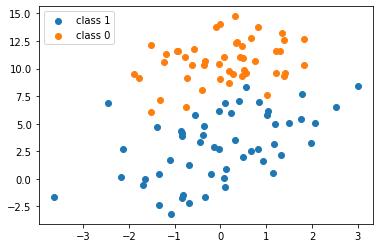

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

classA=[]
classB=[]
i=0
for index in y:
    if index==1.0:
        classA.append(X[i,:])
    else:
        classB.append(X[i, :])
    i+=1
a=plt.scatter(np.asarray(classA)[:,0],np.asarray(classA)[:,-1])

b=plt.scatter(np.asarray(classB)[:,0],np.asarray(classB)[:,-1])
plt.legend((a,b),('class 1','class 0'),loc='upper left')


## Closer look at the step function

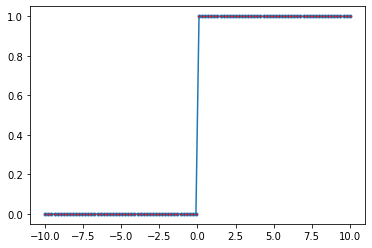

In [ ]:
def stepLR(x):
  if x > 0:
    return 1
  else:
    return 0
  
somex=np.linspace(-10,10,100)
somey=[stepLR(e) for e in somex]
import matplotlib
import matplotlib.pyplot as plt

plt.plot(somex,somey,marker=".",markerfacecolor='r')


## Sigmoid Function

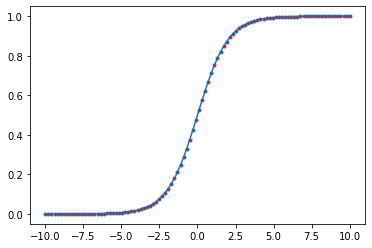

In [ ]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))
somex=np.linspace(-10,10,100)
somey=[sigmoid(e) for e in somex]
import matplotlib
import matplotlib.pyplot as plt

plt.plot(somex,somey,marker=".",markerfacecolor='r')


## Cross Entropy

In [ ]:
def crossEntropy(y,yHat):
  if y == 1:
    return -math.log(yHat)
  else:
    return -math.log(1 - yHat)
  

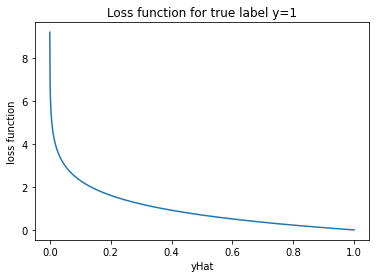

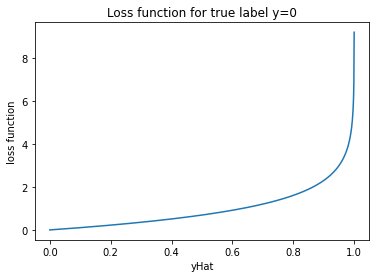

In [ ]:
yhat=np.linspace(0.0001,.9999,1000)
loss = [crossEntropy(1,r) for r in yhat]
plt.plot(yhat,loss)
plt.xlabel("yHat")
plt.ylabel("loss function")
plt.title("Loss function for true label y=1")
plt.show()


yhat=np.linspace(0.0001,.9999,1000)
loss = [crossEntropy(0,r) for r in yhat]
plt.plot(yhat,loss)
plt.xlabel("yHat")
plt.ylabel("loss function")
plt.title("Loss function for true label y=0")
plt.show()

## Same gradient descent works!

(100, 2)
(100,)
(100, 2)
(100,)
[[ 5.42064112]
 [ 0.58470234]
 [-0.78110849]]


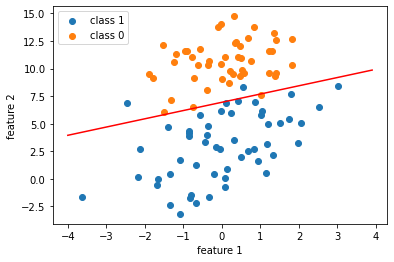

In [ ]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

  
import copy
def learnWeights(X,y,maxIter,alpha):
  ones = np.ones((X.shape[0],1))
  # Deep copy the parameters
  X=copy.deepcopy(X)
  y=copy.deepcopy(y)
  X=np.concatenate((ones,X),axis=1)
  X=np.mat(X)
  y=np.mat(y)
  w=np.random.rand(X.shape[1],1)
  #w = np.ones((X.shape[1], 1))
  for i in range(0,maxIter):
    # predict y
    z=X*w
    predy=sigmoid(z)
    delY = predy-y.T
    delw = X.T * delY
    w = w - delw * alpha
  return w

print(X.shape)
print(y.shape)
w=learnWeights(X,y,1000,0.001)
print(X.shape)
print(y.shape)

print(w)

classA=[]
classB=[]
i=0
for index in y:
    if index==1.0:
        classA.append(X[i,:])
    else:
        classB.append(X[i, :])
    i+=1
a=plt.scatter(np.asarray(classA)[:,0],np.asarray(classA)[:,-1])

b=plt.scatter(np.asarray(classB)[:,0],np.asarray(classB)[:,-1])
plt.legend((a,b),('class 1','class 0'),loc='upper left')


testx = np.arange(-4.0, 4.0, 0.1)

testy = (-w[0]-w[1]*testx)/w[2]
plt.plot(testx,testy.T,color="r")

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X, y)


In [ ]:
clf.predict([[2,3]])

array([1.])

In [ ]:
clf.predict_proba([[2,3]])


array([[2.08691520e-04, 9.99791308e-01]])

In [ ]:
clf.score(X, y)

0.95

## A lighter algorithm for learning weights

```
# This is formatted as code
```



In [ ]:
import random
def NaiveStocGradDescent(X, y, numIter=150):
  X=copy.deepcopy(X)
  y=copy.deepcopy(y)
  m,n = X.shape
  ones = np.ones((X.shape[0], 1))
  X = np.concatenate((ones, X), axis=1)
  X = np.mat(X)
  y = np.mat(y)
  w = np.random.rand(X.shape[1], 1)
  y=y.T
  
  alpha = 0.01
  
  for j in range(10):
    
    for i in range(m):
      i = int(random.uniform(0,m))
      h = sigmoid((X[i])*w)
      error = y[i] - h
      w = w + alpha * (error * X[i]).T
  return w

print(X.shape)
print(y.shape)
w1=NaiveStocGradDescent(X,y)
print(w1)

(100, 2)
(100,)
[[ 1.86204255]
 [ 0.34910328]
 [-0.22802443]]


## How good is the algorithm?

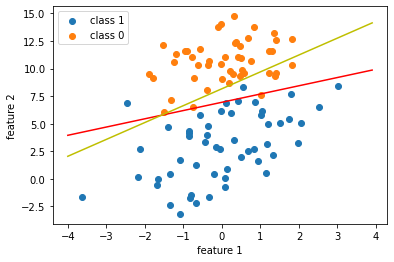

In [ ]:
classA=[]
classB=[]
i=0
for index in y:
    if index==1.0:
        classA.append(X[i,:])
    else:
        classB.append(X[i, :])
    i+=1
a=plt.scatter(np.asarray(classA)[:,0],np.asarray(classA)[:,-1])

b=plt.scatter(np.asarray(classB)[:,0],np.asarray(classB)[:,-1])
plt.legend((a,b),('class 1','class 0'),loc='upper left')


testx = np.arange(-4.0, 4.0, 0.1)

testy = (-w[0]-w[1]*testx)/w[2]
plt.plot(testx,testy.T,color="r")

testy1 = (-w1[0]-w1[1]*testx)/w1[2]
plt.plot(testx,testy1.T,color="y")

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

## Stochastic Gradient Descent